# Linear Regression with Multiple Variable
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.<br>

The file <strong><em>ex1data2.csv</em></strong> contains a training set of housing prices in Portland, Oregon.<br>
The structure of the dataset described blow:<br>
1. First column = <strong>size of the house (in square feet)</strong> 
2. Second column = <strong>number of bedrooms</strong>
3. Third column = <strong>price of the house</strong>

A negative value for profit indicates a loss.<br>
<br> <br>
<strong>
Our assignment has these sections:
1. Plotting the Data
    1. Loading dataset
    2. Ploting scatter
2. Feature Normalization
3. Gradient Descent
    1. Update Equations
    2. Implementation
    3. Computing the cost J(θ)
    4. Gradient Descent
    5. Selecting Learning Rates (alpha)
    6. Make Prediction
    7. Visualization of Fitted Model
4. Normal Equations
5. Visualization J(θ)
    1. Surface
    2. Contour
</strong>

In each section full description provided.

## 1. Plotting Dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only three properties to plot. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 3D plot.)

### 1.A Loading Dataset
We just need to import our data in file to a good structrue to work on it. So best option for us in python is <strong>Pandas</strong>.

In [1]:
# import library
import pandas as pd
import numpy as np
dataset = pd.read_csv('ex1data2.csv',names = ['size(square feet)','#bedrooms','price'])
dataset.head()

,size(square feet),#bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
# splitting to x and y variables for features and target variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('x[0] ={}, y[0] ={}'.format(x[0],y[0]))
m, n = x.shape
print('#{} Number of training samples, #{} features per sample'.format(m,n))

x[0] =[2104    3], y[0] =399900
#47 Number of training samples, #2 features per sample


### 1.B Plotting Scatter
In this step we plot our data in 3D scatter.

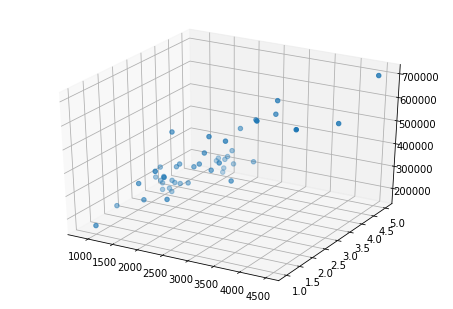

In [3]:
# imporing libraries
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

# visualize our data
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x[:,0], x[:,1], y)
plt.show()

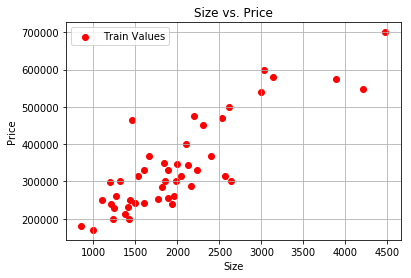

In [4]:
# visualize Size vs. Price
plt.scatter(x[:,0],y, color ='red', label='Train Values')
plt.title('Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

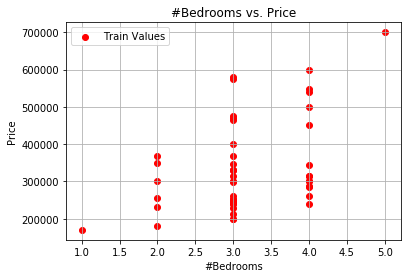

In [5]:
# visualize #Bedrooms vs. Price
plt.scatter(x[:,1],y, color ='red', label='Train Values')
plt.title('#Bedrooms vs. Price')
plt.xlabel('#Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Text(0.5,0.92,'Size and Number of Bedrooms vs. Prices')

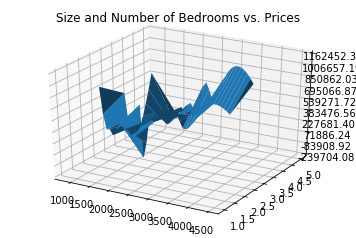

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# copy data
x_vis = x[:,0]
y_vis = x[:,1]
z_vis = y

# create 1D-arrays from the 2D-arrays
x_vis = x_vis.reshape(m)
y_vis = y_vis.reshape(m)
z_vis = z_vis.reshape(m)
xyz = {'x': x_vis, 'y': y_vis, 'z': z_vis}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('Size and Number of Bedrooms vs. Prices')

## 2. Feature Normalization
 By looking at the values, note that house sizes are about <strong>1000</strong> times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
 For normalization, we do these steps:
 1. Subtract the <strong>mean</strong> value of each feature from the dataset
 2. After subtracting the mean, additionally scale (divide) the feature values by their respective <strong>standard deviations<strong>
    
The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature.<br>

<strong>Implementation Note:</strong> When normalizing the features, it is important to <strong>store</strong> the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to <strong>predict</strong> the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the <strong>mean and standard deviation that we had previously</strong> computed from the <strong>training set</strong>.

For this step, we use <strong>sklearn</strong> library and <strong>StandardScaler</strong> to <strong>normalize</strong> our data. see the documentaion <a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler'>here</a>.

In [7]:
# importing library
from sklearn.preprocessing import StandardScaler
import math

std_scaler = StandardScaler()
std_scaler.fit(x)
x = x - std_scaler.mean_
sdv_0 = math.sqrt(std_scaler.var_[0])
sdv_1 = math.sqrt(std_scaler.var_[1])
x = x / (sdv_0,sdv_1)

# normalizing y matrix (if we don't do this, we will get very very big numbers in calculating cost! h-y : y unscaled and h scaled)
std_scaler_y = StandardScaler()
y = y.reshape(m,1)
std_scaler_y.fit(y)
y = y - std_scaler_y.mean_
y = y / math.sqrt(std_scaler_y.var_)

# if you want to calculate mean and sd separatly, you can use Numpy library.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
x[0:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

In [9]:
y[0:5]

array([[ 0.48089023],
       [-0.08498338],
       [ 0.23109745],
       [-0.87639804],
       [ 1.61263744]])

If you look at the scaled data, you can see they are in the same order. In unscaled data, size was 1000 times bigger than number of bedrooms. So we solved it by <strong>x = (x-mean) / st(x)</strong>. There are many other methods you can use.

## 3. Gradinet Descent
In this part, you will fit the linear regression parameters <strong>θ</strong> to our dataset using gradient descent.
Previously, we implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix x.<br> <strong>The hypothesis function and the batch gradient descent update rule remain unchanged</strong>.

### 3.A Update Equation
The objective of linear regression is to minimize the cost function: <img src='img/j.jpg'>
where the hypothesis <strong>h<sub>θ</sub>(x)</strong> is given by the linear model: <img src='img/h.jpg'>
Recall that the parameters of your model are the <strong>θj</strong> values. These are the values you will adjust to minimize cost <strong>J(θ)</strong>. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update: !<img src='img/thta.jpg'><br>
With each step of gradient descent, your parameters <strong>θj</strong> come closer to the optimal values that will achieve the lowest cost <strong>J(θ)</strong>.<br>

### 3.B Implementation
<strong>Implementation Note:</strong> We store each example as a row in the the <strong>x</strong> matrix in python. To take into account the intercept term <strong>(θ<sub>0</sub>)</strong>, we add an additional first column to <strong>x</strong> and set it to all <strong>ones</strong>. This allows us to treat <strong>(θ<sub>0</sub>)</strong> as simply another <strong>feature</strong>.<br><br>
<strong>Implementation Note:</strong> In the multivariate case, the cost function can also be written in the following vectorized form: <img src = 'img/jmult.jpg'>
where <img src = 'img/jmult_p.jpg'><br>
In the following lines, we add another dimension to our data to accommodate the <strong>(θ<sub>0</sub>)</strong> intercept term. We also initialize the <strong>initial parameters to 0</strong> and the learning rate <strong>alpha to 0.01</strong>.

In [10]:
# import library
import numpy as np

# appending ones to our x 
z = np.ones(m)
z = z.reshape(m,1)
x = np.append(z,x,axis =1)

In [11]:
print('x.shape = {}, x[0] = {}'.format(x.shape,x[0]))

x.shape = (47, 3), x[0] = [ 1.          0.13141542 -0.22609337]


In [12]:
# n is the number of features and m is the number of samples of training set
m, n = x.shape

# define theta as zero
theta = np.zeros(n)
theta = theta.reshape(n,1)

# iterations to update theta and minimize J
iterations = 1500

# alpha the learning rate in gradient descent update formula
alpha = 0.01

### 3.C Compute Cost J(θ)
As you perform gradient descent to learn minimize the cost function <strong>J(θ)</strong>, it is helpful to monitor the convergence by computing the cost. In this section, we implement a function to calculate <strong>J(θ)</strong> so you can check the convergence of your gradient descent implementation.

<strong>compute_cost(x, y, theta)</strong> computes the cost of using theta as the parameter for linear regression to fit the data points in x and y.
To calculate this function, we need hypothesis <strong>h<sub>θ</sub>(x)</strong> as mentioned in the previous section.

In [13]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [14]:
def compute_cost(x, y, theta):
    loss = hypothesis(x,theta)-y
    cost = np.sum(loss ** 2)/(2*m)
    return cost,loss

In [15]:
compute_cost(x,y,theta)[0]

0.5

It is important to know this type of computing cost is not comparable. We just know lower is better and zero is best. And something like scaling can make it bigger or smaller. So for comparing, all situations must be same!

### 3.D Gradient Descent
Keep in mind that the cost <strong>J(θ)</strong> is parameterized by the vector <strong>θ</strong>, not <strong>x</strong> and <strong>y</strong>. That is, we minimize the value of <strong>J(θ)</strong> by changing the values of the vector <strong>θ</strong>, not by changing <strong>x</strong> or <strong>y</strong>.
A good way to verify that gradient descent is working correctly is to look at the value of <strong>J(θ)</strong> and check that it is decreasing with each step and your value of <strong>J(θ)</strong> should never increase, and should converge to a steady value by the end of the algorithm.

<strong>gradient_descent(x, y, theta, alpha, iterations)</strong> updates theta by taking iterations gradient steps with learning rate alpha.

In [16]:
# here we define z value for z axis of 3D surface and Contour diagram
z = np.zeros(iterations+1)
def gradient_descent(x,x_tran,y,theta,alpha,iterations):
    for i in range(iterations):
        cost,loss = compute_cost(x,y,theta)
        z[i] = cost
        if (i%50 == 0):
            print('Iteration #{} ====== cost = {}\n'.format(i,cost))
        gradient = np.dot(x_tran,(loss))
        theta = theta - alpha*(gradient/m)
    return theta

### 3.E Selecting Learning Rates (alpha)
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. y if your value of J(θ)
increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate α on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.
If we do right, we should get a curve like this: <img src='img/alpha_cost.jpg'><br>
Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!


In [17]:
alpha_rates = [0.01,0.03,0.1,0.3,1,2,3]
for i in range(len(alpha_rates)):
    theta = np.zeros(n)
    theta = theta.reshape(n,1) # make sure theta not updated and it is always zero before new train
    print('################################################################################')
    print('Training with alpha = {}\n'.format(alpha_rates[i]))
    x_transposed = x.transpose()
    gradient_descent(x = x,x_tran = x_transposed,y = y,theta = theta,alpha = alpha_rates[i],iterations = (iterations+1))
    print('#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*')

################################################################################
Training with alpha = 0.01

Iteration #0 ====== cost = 0.5

Iteration #50 ====== cost = 0.2517756317131742

Iteration #100 ====== cost = 0.1852095166088632

Iteration #150 ====== cost = 0.16171485631538343

Iteration #200 ====== cost = 0.15061173588265697

Iteration #250 ====== cost = 0.144301118524218

Iteration #300 ====== cost = 0.14041384329729917

Iteration #350 ====== cost = 0.13794870098105802

Iteration #400 ====== cost = 0.13637010283773102

Iteration #450 ====== cost = 0.13535599467793766

Iteration #500 ====== cost = 0.13470384837630947

Iteration #550 ====== cost = 0.13428433042785282

Iteration #600 ====== cost = 0.1340144304942597

Iteration #650 ====== cost = 0.1338407823746823

Iteration #700 ====== cost = 0.13372905946039002

Iteration #750 ====== cost = 0.13365717814828126

Iteration #800 ====== cost = 0.1336109304372658

Iteration #850 ====== cost = 0.13358117511539044

Iteration #900 ==


Iteration #1400 ====== cost = 0.13352749098554287

Iteration #1450 ====== cost = 0.13352749098554287

Iteration #1500 ====== cost = 0.13352749098554287

#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
################################################################################
Training with alpha = 2

Iteration #0 ====== cost = 0.5

Iteration #50 ====== cost = 1.1564142393645027e+32

Iteration #100 ====== cost = 4.9585628904729275e+64

Iteration #150 ====== cost = 2.126171150597974e+97

Iteration #200 ====== cost = 9.116761976178084e+129

Iteration #250 ====== cost = 3.909156085901681e+162

Iteration #300 ====== cost = 1.676198341458559e+195

Iteration #350 ====== cost = 7.1873335783172085e+227

Iteration #400 ====== cost = 3.0818407755406515e+260

Iteration #450 ====== cost = 1.3214556500393794e+293

Iteration #500 ====== cost = inf

Iteration #550 ====== cost = inf

Iteration #600 ====== cost = inf

Iteration #650 ====== cost 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In this particular dataset, we get best <strong>θ</strong> values by setting <strong>alpha to [0.03,0.1,1]</strong>. This values may cause to <strong>explosion on cost</strong> values. And we can see when <strong>alpha = [2,3]</strong>, our cost grow up and goes to infinity so we should decrease alpha.

In [18]:
# now we know best alpha so get our theta by this value of alpha = 0.03
x_transposed = x.transpose()
theta = gradient_descent(x = x,x_tran = x_transposed,y = y,theta = theta,alpha = 0.03,iterations = (iterations+1))

Iteration #0 ====== cost = 0.5

Iteration #50 ====== cost = 0.1613869107507196

Iteration #100 ====== cost = 0.14033056850905265

Iteration #150 ====== cost = 0.1353239986876963

Iteration #200 ====== cost = 0.1340031151468243

Iteration #250 ====== cost = 0.13365342224996946

Iteration #300 ====== cost = 0.13356083395771684

Iteration #350 ====== cost = 0.13353631924503687

Iteration #400 ====== cost = 0.13352982845460468

Iteration #450 ====== cost = 0.13352810988008482

Iteration #500 ====== cost = 0.1335276548510075

Iteration #550 ====== cost = 0.13352753437240233

Iteration #600 ====== cost = 0.13352750247313472

Iteration #650 ====== cost = 0.1335274940271266

Iteration #700 ====== cost = 0.13352749179086673

Iteration #750 ====== cost = 0.13352749119876944

Iteration #800 ====== cost = 0.13352749104199915

Iteration #850 ====== cost = 0.13352749100049086

Iteration #900 ====== cost = 0.13352749098950067

Iteration #950 ====== cost = 0.13352749098659078

Iteration #1000 ====== c

Here we visualize cost values based on different alpha values to understand better.

## 3.F Make Prediction
Use the value of <strong>θ</strong> to predict the price of a house with <strong>1650 square feet and 3 bedrooms</strong>.<br>
Don’t forget to <strong>normalize</strong> your features when you make this <strong>prediction</strong>!

In [19]:
theta

array([[ -7.41605359e-17],
       [  8.84765987e-01],
       [ -5.31788186e-02]])

In [33]:
# feature scaling and adding one to attend term theta0
test = np.zeros(2)
test[0] = 1650
test[1] = 3
test = test.reshape(1,2)
test = test - std_scaler.mean_
test = test / (sdv_0,sdv_1)

# appending ones to our x 
one = np.ones(1)
one = one.reshape(1,1)
test = np.append(one,test,axis =1)

In [36]:
test

array([[ 1.        , -0.44604386, -0.22609337]])

In [38]:
predict_1 = np.dot(test,theta)
print('profit prediction on house with size of 1650 and 3 bedrooms = {}'.format(predict_1))

profit prediction on house with size of 1650 and 3 bedrooms = [[-0.38262106]]


In [42]:
# now we rescale to default value for y
y_pred = predict_1*math.sqrt(std_scaler_y.var_) + std_scaler_y.mean_
print('profit prediction on house with size of 1650 and 3 bedrooms = {}'.format(y_pred))
# you can see the sample number 6! it is very similar!

profit prediction on house with size of 1650 and 3 bedrooms = [[ 293081.46436264]]


## 4. Normal Equation
the closed-form solution to linear regression is <img src='img/normal.jpg'>.  Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.
Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term (θ0)